In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re

%matplotlib inline
sns.set_palette("pastel")

## World Bank data related to trade flows

#### Few countries outside of the cluster of the Western economies have managed to reach the status of developed. My hypothesis explores the possibility that trade can influence and have a high impact on the economic growth of countries. In this project I compare the top 4 Asian economies (excluding China) and top 4 Latin American economies (taking more into account the impact they can have on trade flows, rather than their current stagnation). 

### Data Preparation
Exploring the data, format, values and other aspects of it to clean it thereafter and conduct timely analysis

In [2]:
countries = pd.read_csv('Countries_CSVs/new_countries.csv')
definitions = pd.read_csv('Countries_CSVs/new_definitions.csv')


In [3]:
# Checking datatypes and exploring datq
countries.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
1960 [YR1960]     object
                  ...   
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]     object
Length: 64, dtype: object

In [4]:
definitions.dtypes

Code                                   object
License Type                           object
Indicator Name                         object
Long definition                        object
Source                                 object
Topic                                  object
Periodicity                            object
Aggregation method                     object
Statistical concept and methodology    object
Development relevance                  object
Limitations and exceptions             object
General comments                       object
License URL                            object
dtype: object

In [5]:
countries.head(5)

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Indonesia,IDN,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,12.5576627370579,13.6141246543289,5.39285446783012,9.34928945400149,13.0651153010444,5.73597638127372,...,2.240224e+01,2.385266e+01,2.498852e+01,2.471380e+01,2.441419e+01,2.077746e+01,1.833235e+01,1.917819e+01,2.202972e+01,18.8958822798066
1,Indonesia,IDN,Imports of goods and services (annual % growth),NE.IMP.GNFS.KD.ZG,..,34.6938775511049,-1.96969696971165,-26.5842349304464,8.84210526294696,-8.12379110233644,...,1.734432e+01,1.502888e+01,7.998411e+00,1.861897e+00,2.119702e+00,-6.249011e+00,-2.405113e+00,8.067946e+00,1.188120e+01,-7.68714262634181
2,Indonesia,IDN,"Imports of goods and services (BoP, current US$)",BM.GSR.GNFS.CD,..,..,..,..,..,..,...,1.454242e+11,1.889751e+11,2.128910e+11,2.112702e+11,2.018508e+11,1.659935e+11,1.595590e+11,1.827754e+11,2.186452e+11,204342917226.159
3,Indonesia,IDN,Imports of goods and services (current US$),NE.IMP.GNFS.CD,..,..,..,..,..,..,...,1.691580e+11,2.129969e+11,2.293621e+11,2.255194e+11,2.174852e+11,1.788637e+11,1.708350e+11,1.947773e+11,2.296027e+11,211480972417.496
4,Indonesia,IDN,"Service imports (BoP, current US$)",BM.GSR.NFSV.CD,..,..,..,..,..,..,...,2.646099e+10,3.169142e+10,3.422407e+10,3.501425e+10,3.354062e+10,3.091755e+10,3.040721e+10,3.270682e+10,3.769192e+10,39398285119.7917


In [6]:
definitions.head()

,Code,License Type,Indicator Name,Long definition,Source,Topic,Periodicity,Aggregation method,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,License URL
0,NE.IMP.GNFS.ZS,CC BY-4.0,Imports of goods and services (% of GDP),Imports of goods and services represent the va...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Sha...,Annual,Weighted average,Gross domestic product (GDP) from the expendit...,NaN,Because policymakers have tended to focus on f...,NaN,https://datacatalog.worldbank.org/public-licen...
1,NE.IMP.GNFS.KD.ZG,CC BY-4.0,Imports of goods and services (annual % growth),Annual growth rate of imports of goods and ser...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Gro...,Annual,Weighted average,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
2,BM.GSR.GNFS.CD,CC BY-4.0,"Imports of goods and services (BoP, current US$)",Imports of goods and services comprise all tra...,"International Monetary Fund, Balance of Paymen...",Economic Policy & Debt: Balance of payments: C...,Annual,Gap-filled total,The balance of payments (BoP) is a double-entr...,The balance of payments records an economy’s t...,Discrepancies may arise in the balance of paym...,Note: Data are based on the sixth edition of t...,https://datacatalog.worldbank.org/public-licen...
3,NE.IMP.GNFS.CD,CC BY-4.0,Imports of goods and services (current US$),Imports of goods and services represent the va...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: US$...,Annual,Gap-filled total,Gross domestic product (GDP) from the expendit...,NaN,Because policymakers have tended to focus on f...,NaN,https://datacatalog.worldbank.org/public-licen...
4,BM.GSR.NFSV.CD,CC BY-4.0,"Service imports (BoP, current US$)",Services refer to economic output of intangibl...,"International Monetary Fund, Balance of Paymen...",Economic Policy & Debt: Balance of payments: C...,Annual,Gap-filled total,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,https://datacatalog.worldbank.org/public-licen...


In [7]:
definitions.loc[12, 'Long definition']

'Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2010 U.S. dollars. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.'

In [8]:
countries.shape

(117, 64)

In [9]:
# All values are objects. Corresponding columns will be afterwards turned into floats and rounded to have better handling. 
countries.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
1960 [YR1960]     object
                  ...   
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]     object
Length: 64, dtype: object

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
# Using years as rows for countries dataset
countries = countries.transpose()


In [12]:
nulls_countries = countries.columns[countries.isnull().any()].tolist()

In [13]:
nulls_countries

[112, 113, 114, 115, 116]

In [14]:
# Looking into the columns with null values
countries[[112]].head()

,112
Country Name,NaN
Country Code,NaN
Series Name,NaN
Series Code,NaN
1960 [YR1960],NaN


In [15]:
for n in nulls_countries:
    print(countries[n].isnull().sum()/100)

0.64
0.64
0.64
0.63
0.63


In [16]:
#Drop columns with NAN values
countries = countries.drop(nulls_countries, axis=1)

## Fixing index 

In [17]:
countries.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            102, 103, 104, 105, 106, 107, 108, 109, 110, 111],
           dtype='int64', length=112)

In [18]:
countries

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
Country Name,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,...,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile
Country Code,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,...,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),...,"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,...,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],12.5576627370579,..,..,..,..,..,11.5325474115838,..,..,..,...,..,..,13.0561786878124,..,..,536608944.069088,..,..,..,..
1961 [YR1961],13.6141246543289,34.6938775511049,..,..,..,..,11.0614762816422,9.03846153842458,..,..,...,..,..,11.4045154886266,4.94457618496662,..,525717060.801627,..,..,5.24527188577721,..
1962 [YR1962],5.39285446783012,-1.96969696971165,..,..,..,..,5.1681521983372,-8.64197530862099,..,..,...,..,..,11.3512091033145,2.60928358373558,..,614812442.87852,..,..,4.02668562467936,..
1963 [YR1963],9.34928945400149,-26.5842349304464,..,..,..,..,9.06881077038145,-5.98455598453009,..,..,...,..,..,12.2978637668483,5.26926591953077,..,697065976.799525,..,..,5.84014013697538,..
1964 [YR1964],13.0651153010444,8.84210526294696,..,..,..,..,12.2520501857433,11.9096509240471,..,..,...,..,..,12.2491437471045,9.22865975632796,..,732786384.66917,..,..,2.55722054231921,..
1965 [YR1965],5.73597638127372,-8.12379110233644,..,..,..,..,5.2762547448334,3.11926605503989,..,..,...,..,..,13.2775042844486,-0.844559144624952,..,800181243.362563,..,..,0.950272505266042,..


In [19]:
countries.columns=countries.iloc[0]

In [20]:
countries = countries.drop(countries.index[0])

In [21]:
countries

Country Name,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,...,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile
Country Code,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,...,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),...,"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,...,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],12.5576627370579,..,..,..,..,..,11.5325474115838,..,..,..,...,..,..,13.0561786878124,..,..,536608944.069088,..,..,..,..
1961 [YR1961],13.6141246543289,34.6938775511049,..,..,..,..,11.0614762816422,9.03846153842458,..,..,...,..,..,11.4045154886266,4.94457618496662,..,525717060.801627,..,..,5.24527188577721,..
1962 [YR1962],5.39285446783012,-1.96969696971165,..,..,..,..,5.1681521983372,-8.64197530862099,..,..,...,..,..,11.3512091033145,2.60928358373558,..,614812442.87852,..,..,4.02668562467936,..
1963 [YR1963],9.34928945400149,-26.5842349304464,..,..,..,..,9.06881077038145,-5.98455598453009,..,..,...,..,..,12.2978637668483,5.26926591953077,..,697065976.799525,..,..,5.84014013697538,..
1964 [YR1964],13.0651153010444,8.84210526294696,..,..,..,..,12.2520501857433,11.9096509240471,..,..,...,..,..,12.2491437471045,9.22865975632796,..,732786384.66917,..,..,2.55722054231921,..
1965 [YR1965],5.73597638127372,-8.12379110233644,..,..,..,..,5.2762547448334,3.11926605503989,..,..,...,..,..,13.2775042844486,-0.844559144624952,..,800181243.362563,..,..,0.950272505266042,..
1966 [YR1966],22.0955998733777,-4.2105263157203,..,..,..,..,12.7572016460905,-1.06761565839287,..,..,...,..,..,14.3402501357152,4.01002160927375,..,1014234414.27814,..,..,11.2362424530091,..


### Making each country into a dataframe because per country each column's name has the name of the country

In [22]:
# Initial idea on how to seperate each country in a dataframe
countries.filter(like='Brazil')

Country Name,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
Country Code,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],7.11728554327239,..,..,1079376914.93865,..,..,7.05904647646368,..,..,1070544628.54537,..,..,..,..
1961 [YR1961],7.33945907077904,-3.48843308833531,..,1118302726.08473,..,..,7.27940794590105,5.19408591869809,..,1109152823.34559,..,..,10.275911554301,..
1962 [YR1962],5.18897394767796,-1.20431186245116,..,1033970196.04432,..,..,3.86876017137378,-7.40697094349359,..,770900519.674771,..,..,5.21605942017898,..
1963 [YR1963],9.11100002127562,-2.43879567951019,..,2097486800.99115,..,..,9.03645424482606,27.9999537191722,..,2080325261.99351,..,..,0.874672592408302,..
1964 [YR1964],5.6776000056402,-12.5004082704348,..,1204326396.14961,..,..,6.38540927082227,-13.5418615762703,..,1354466134.88626,..,..,3.4855823042772,..
1965 [YR1965],5.55592484290456,-14.2862484150039,..,1210637974.35359,..,..,7.73576138413985,3.61684823505183,..,1685625122.1861,..,..,3.05348789366924,..
1966 [YR1966],5.99166922704867,31.6662865082342,..,1621508461.2021,..,..,6.82473507896306,11.6278405073585,..,1846958711.61305,..,..,4.15036023303348,..


In [23]:
countries_columns = list(countries.columns.unique())

In [24]:
countries_columns

['Indonesia',
 'Japan',
 'Korea, Rep.',
 'India',
 'Brazil',
 'Mexico',
 'Argentina',
 'Chile']

In [25]:
country = {}
for name in countries_columns:
    country[name] = pd.DataFrame(countries.filter(like=name))

In [26]:
country['Argentina']

Country Name,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
Country Code,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],7.60404697912324,..,..,..,..,..,7.60404910825644,..,..,..,..,..,..,..
1961 [YR1961],5.99494531619397,18.1768928497726,..,..,..,..,5.9949469947787,-10.6385917324185,..,..,..,..,5.42784287951248,..
1962 [YR1962],9.38368289056535,0,..,2294367226.53985,..,..,4.69184275899831,45.2384632307518,..,1147183934.48134,..,..,-0.852021523481966,..
1963 [YR1963],7.89045203275027,-23.0833969136606,..,1441753153.10994,..,..,7.89045420262462,0,..,1441753549.59206,..,..,-5.30819682651727,..
1964 [YR1964],5.56371407476368,20.0123928703162,..,1424602863.7313,..,..,5.56371560478508,-8.19666133346863,..,1424603255.4971,..,..,10.1302976614338,..
1965 [YR1965],4.15058297228058,0,..,1176470539.39431,..,..,6.22587443766796,8.92850026211178,..,1764705803.20912,..,..,10.5694333403429,..
1966 [YR1966],4.98968803354159,-8.3311443548433,..,1428571371.44429,..,..,6.65291738359955,16.3934313399595,..,1904761830.17968,..,..,-0.659726171593704,..


## Renaming columns

In [27]:
type(country['Argentina'])

pandas.core.frame.DataFrame

In [28]:
#column identifiers
(country['Argentina']).loc['Series Name',:]

Country Name
Argentina            Imports of goods and services (% of GDP)
Argentina     Imports of goods and services (annual % growth)
Argentina    Imports of goods and services (BoP, current US$)
Argentina         Imports of goods and services (current US$)
Argentina                  Service imports (BoP, current US$)
Argentina                    Goods imports (BoP, current US$)
Argentina            Exports of goods and services (% of GDP)
Argentina     Exports of goods and services (annual % growth)
Argentina    Exports of goods and services (BoP, current US$)
Argentina         Exports of goods and services (current US$)
Argentina                  Service exports (BoP, current US$)
Argentina                    Goods exports (BoP, current US$)
Argentina                               GDP growth (annual %)
Argentina       GDP per capita, PPP (current international $)
Name: Series Name, dtype: object

### The meaning of the new column names to be used as reference

|Column Identifier | Meaning |
| --- | --- |
| IM_GDP_P | Imports of goods and services (% of GDP) |
| IM_Growth_P | Imports of goods and services (annual % growth) |
| IM_BoP | Imports of goods and services (current US dollar) |
| IM_dll | Imports of goods and services (current US dollar) |
| IM_Services_dll | Service imports (BoP, current US dollar) |
| IM_Goods_dll | Goods imports (BoP, current US dollar) |
| EX_GDP_P | Exports of goods and services (% of GDP) |
| EX_Growth_P | Exports of goods and services (annual % growth) |
| EX_BoP | Exports of goods and services (BoP, current US dollar) |
| EX_dll | Exports of goods and services (current US dollar) |
| EX_Services_dll | Service exports (BoP, current US dollar) | 
| EX_Goods_dll | Goods exports (BoP, current US dollar) |
| GDP_PPP | GDP per capita, PPP (current international dollar) |
| GDP_Growth_P | GDP growth (annual %) |


In [29]:
column_names = ['IM_GDP_P', 'IM_Growth_P', 'IM_BoP', 'IM_dll', 'IM_Services_dll', 'IM_Goods_dll', 'EX_GDP_P', 'EX_Growth_P', 'EX_BoP', 'EX_dll', 'EX_Services_dll', 'EX_Goods_dll', 'GDP_PPP', 'GDP_Growth_P']

In [30]:
(country['Argentina']).columns = column_names

In [31]:
# renaming columns for each country dataframe
for cols in countries_columns:
    (country[cols]).columns = column_names

In [32]:
country['Mexico'].head()

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_PPP,GDP_Growth_P
Country Code,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],11.6636809815951,..,..,1520944000,..,..,8.50552147239264,..,..,1109120000,..,..,..,..
1961 [YR1961],10.6152542372881,-1.17440659755447,..,1503120000,..,..,8.41248587570621,8.84211608345005,..,1191208000,..,..,5.0000000024334,..


## Exploring the null values

In [33]:
country['Argentina'].isnull().sum()

IM_GDP_P           0
IM_Growth_P        0
IM_BoP             0
IM_dll             0
IM_Services_dll    0
IM_Goods_dll       0
EX_GDP_P           0
EX_Growth_P        0
EX_BoP             0
EX_dll             0
EX_Services_dll    0
EX_Goods_dll       0
GDP_PPP            0
GDP_Growth_P       0
dtype: int64

In [34]:
country['Argentina'].isin(['..']).any()

IM_GDP_P           False
IM_Growth_P         True
IM_BoP              True
IM_dll              True
IM_Services_dll     True
IM_Goods_dll        True
EX_GDP_P           False
EX_Growth_P         True
EX_BoP              True
EX_dll              True
EX_Services_dll     True
EX_Goods_dll        True
GDP_PPP             True
GDP_Growth_P        True
dtype: bool

In [35]:
#countries missing data until 1989

#Reason according to the World Bank:
#'Government finance statistics uses updated indicator definitions and 
#methodology which only allowed for a consistent time series beginning 
#no earlier than 1990.'
country['Indonesia'][country['Indonesia'].isin(['..'])].stack()

1960 [YR1960]  IM_Growth_P        ..
               IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_Growth_P        ..
               EX_BoP             ..
               EX_dll             ..
               EX_Services_dll    ..
               EX_Goods_dll       ..
               GDP_PPP            ..
               GDP_Growth_P       ..
1961 [YR1961]  IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_BoP             ..
               EX_dll             ..
               EX_Services_dll    ..
               EX_Goods_dll       ..
               GDP_Growth_P       ..
1962 [YR1962]  IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_BoP             ..
               EX_dll             ..
 

In [36]:
# All contries missing: 1960 Imports of goods and services (annual % growth)
# Hong Kong missing 1960 and 1961
country['Indonesia']['GDP_Growth_P']

Country Code                                               IDN
Series Name      GDP per capita, PPP (current international $)
Series Code                                  NY.GDP.PCAP.PP.CD
1960 [YR1960]                                               ..
1961 [YR1961]                                               ..
1962 [YR1962]                                               ..
1963 [YR1963]                                               ..
1964 [YR1964]                                               ..
1965 [YR1965]                                               ..
1966 [YR1966]                                               ..
1967 [YR1967]                                               ..
1968 [YR1968]                                               ..
1969 [YR1969]                                               ..
1970 [YR1970]                                               ..
1971 [YR1971]                                               ..
1972 [YR1972]                                          

## Reference table for missing values

Table showing when the columns with '..' start showing data. This table will be used as reference to be able to turn the '..' into zeroes and transform the object values into floats.

| Measure Imports & Exports| Data available since year |
| --- | --- |
| GDP Growth | 1960s/1961 |
| Goods and services % growth | 1961 |
| Balance of Payments in dlls | 1981 |
| Current dll value | 1967 |
| Services in dlls | 1981 |
| Goods in dlls | 1981 |
| GDP per capita/ PPP | 1990 |
| GDP Growth % | 1990 |

In [37]:
country['Mexico'][country['Mexico'].isin(['0'])].stack()

Series([], dtype: object)

## Replacing '..' and turning corresponding values to floats

In [38]:
country['Argentina'].shape

(63, 14)

In [39]:
# Replacing '..' with zeroes
for dots in countries_columns:
    country[dots] = country[dots].replace('..', 0)

In [40]:
# First three rows are objects. Slicing the dataframe to consider numeric 
# values and converting values to floats 
for objects in countries_columns:
    country[objects] = country[objects].iloc[3:63,:].astype(float).round(4)


In [41]:
country['Indonesia'].dtypes

IM_GDP_P           float64
IM_Growth_P        float64
IM_BoP             float64
IM_dll             float64
IM_Services_dll    float64
IM_Goods_dll       float64
EX_GDP_P           float64
EX_Growth_P        float64
EX_BoP             float64
EX_dll             float64
EX_Services_dll    float64
EX_Goods_dll       float64
GDP_PPP            float64
GDP_Growth_P       float64
dtype: object

In [42]:
country['Indonesia'].head()

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_PPP,GDP_Growth_P
1960 [YR1960],12.5577,0.0000,0.0,0.0,0.0,0.0,11.5325,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0
1961 [YR1961],13.6141,34.6939,0.0,0.0,0.0,0.0,11.0615,9.0385,0.0,0.0,0.0,0.0,5.7406,0.0
1962 [YR1962],5.3929,-1.9697,0.0,0.0,0.0,0.0,5.1682,-8.6420,0.0,0.0,0.0,0.0,1.8420,0.0
1963 [YR1963],9.3493,-26.5842,0.0,0.0,0.0,0.0,9.0688,-5.9846,0.0,0.0,0.0,0.0,-2.2370,0.0
1964 [YR1964],13.0651,8.8421,0.0,0.0,0.0,0.0,12.2521,11.9097,0.0,0.0,0.0,0.0,3.5297,0.0


In [43]:
pd.reset_option("display.max_rows")

## Suppressing scientific notation

#### for better understanding of the numeric values and for comparison

In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [45]:
country['India'].head()

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_PPP,GDP_Growth_P
1960 [YR1960],6.834,0.000,0.000,2530502530.503,0.000,0.000,4.463,0.000,0.000,1652701652.702,0.000,0.000,0.000,0.000
1961 [YR1961],5.958,-9.756,0.000,2337302337.302,0.000,0.000,4.304,-0.186,0.000,1688401688.402,0.000,0.000,3.723,0.000
1962 [YR1962],6.032,3.909,0.000,2543102543.102,0.000,0.000,4.169,-0.580,0.000,1757701757.702,0.000,0.000,2.931,0.000
1963 [YR1963],5.907,3.392,0.000,2860202860.203,0.000,0.000,4.280,8.404,0.000,2072702072.702,0.000,0.000,5.994,0.000
1964 [YR1964],5.685,3.380,0.000,3210903210.903,0.000,0.000,3.726,-6.512,0.000,2104202104.202,0.000,0.000,7.453,0.000


In [46]:
#Having year in it's own column
#country['Argentina'] = country['Argentina'].reset_index()

for i in countries_columns:
    country[i] = country[i].reset_index()

In [47]:
# renaming column 'index' to 'Year'

for year in countries_columns:
    country[year] = country[year].rename(columns={'index':'Year'})

## Removing [Year] from year column

In [48]:
#country['Argentina']['Year']= country['Argentina']['Year'].apply(lambda x: re.sub(r"\[.*\]", "", x))

for a in countries_columns:
    country[a]['Year']= country[a]['Year'].apply(lambda x: re.sub(r"\[.*\]", "", x))

In [49]:
country['Brazil'].head()

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_PPP,GDP_Growth_P
0,1960,7.117,0.000,0.000,1079376914.939,0.000,0.000,7.059,0.000,0.000,1070544628.545,0.000,0.000,0.000,0.000
1,1961,7.340,-3.488,0.000,1118302726.085,0.000,0.000,7.279,5.194,0.000,1109152823.346,0.000,0.000,10.276,0.000
2,1962,5.189,-1.204,0.000,1033970196.044,0.000,0.000,3.869,-7.407,0.000,770900519.675,0.000,0.000,5.216,0.000
3,1963,9.111,-2.439,0.000,2097486800.991,0.000,0.000,9.037,28.000,0.000,2080325261.993,0.000,0.000,0.875,0.000
4,1964,5.678,-12.500,0.000,1204326396.150,0.000,0.000,6.385,-13.542,0.000,1354466134.886,0.000,0.000,3.486,0.000


In [50]:
# Converting 'Year' object into an integer
for number in countries_columns:
    country[number]['Year'] = country[number]['Year'].astype(int)

In [51]:
country['Argentina'].dtypes

Year                 int32
IM_GDP_P           float64
IM_Growth_P        float64
IM_BoP             float64
IM_dll             float64
IM_Services_dll    float64
IM_Goods_dll       float64
EX_GDP_P           float64
EX_Growth_P        float64
EX_BoP             float64
EX_dll             float64
EX_Services_dll    float64
EX_Goods_dll       float64
GDP_PPP            float64
GDP_Growth_P       float64
dtype: object

## Adding a column with Country name to use after as identifier

In [52]:
len(country['Argentina'])

60

In [53]:
'a' * 6

'aaaaaa'

In [54]:
# abbreviation of countries
#'BR', 'AG', 'MX', 'CH', 'HK', 'SG', 'KR', 'ID'

country['Argentina']['Country Name'] = (['AG'] * 60) 

In [55]:
country['Japan']['Country Name'] = (['JP'] * 60)
country['Mexico']['Country Name'] = (['MX'] * 60) 
country['Chile']['Country Name'] = (['CH'] * 60)
country['India']['Country Name'] = (['IN'] * 60)
country['Brazil']['Country Name'] = (['BR'] * 60)
country['Korea, Rep.']['Country Name'] = (['KR'] * 60)
country['Indonesia']['Country Name'] = (['ID'] * 60)

In [56]:
country['Korea, Rep.'].head()

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_PPP,GDP_Growth_P,Country Name
0,1960,11.979,0.000,0.000,474140116.087,0.000,0.000,2.622,0.000,0.000,103762704.991,0.000,0.000,0.000,0.000,KR
1,1961,13.961,-8.640,0.000,337523799.755,0.000,0.000,4.041,35.462,0.000,97683169.967,0.000,0.000,6.936,0.000,KR
2,1962,15.596,35.165,0.000,438924765.095,0.000,0.000,3.873,15.614,0.000,109000419.232,0.000,0.000,3.895,0.000,KR
3,1963,14.655,24.997,0.000,584540709.772,0.000,0.000,3.946,14.598,0.000,157385220.712,0.000,0.000,9.021,0.000,KR
4,1964,12.380,-24.858,0.000,428205544.273,0.000,0.000,4.963,28.971,0.000,171665671.402,0.000,0.000,9.474,0.000,KR


## Considering only years from 1980 onward to conduct a more 'just' analysis with the available data from the World Bank

In [57]:
country['Brazil'].shape

(60, 16)

In [58]:
Indonesia_80s = country['Indonesia'].iloc[20:60]
Japan_80s = country['Japan'].iloc[20:60]
Skorea_80s = country['Korea, Rep.'].iloc[20:60]
India_80s = country['India'].iloc[20:60]
Brazil_80s = country['Brazil'].iloc[20:60]
Mexico_80s = country['Mexico'].iloc[20:60]
Argentina_80s = country['Argentina'].iloc[20:60]
Chile_80s = country['Chile'].iloc[20:60]

In [59]:
Skorea_80s.head()

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_PPP,GDP_Growth_P,Country Name
20,1980,37.092,-3.336,25318600000.000,24257445302.339,3739900000.000,21578700000.000,28.439,8.515,20041500000.000,18598850896.400,5026200000.000,15015300000.000,-1.646,0.000,KR
21,1981,37.191,4.673,28326100000.000,27124943100.891,4110000000.000,24216100000.000,29.940,13.863,24161800000.000,21836189301.499,6147300000.000,18014500000.000,7.246,0.000,KR
22,1982,32.861,1.514,27041100000.000,25749575969.798,3990000000.000,23051100000.000,27.368,2.048,23862000000.000,21445122284.839,7174700000.000,16687300000.000,8.338,0.000,KR
23,1983,30.026,6.884,27374300000.000,26351401869.159,3991500000.000,23382800000.000,27.886,16.459,25863400000.000,24472574927.489,6862200000.000,19001200000.000,13.376,0.000,KR
24,1984,28.464,4.320,28669100000.000,27755155214.770,4037500000.000,24631600000.000,28.904,12.620,29298300000.000,28184322191.618,6952200000.000,22346100000.000,10.552,0.000,KR


## Index

In [60]:
Indonesia_80s.reset_index(inplace=True)
Japan_80s.reset_index(inplace=True)
Skorea_80s.reset_index(inplace=True)
India_80s.reset_index(inplace=True)
Brazil_80s.reset_index(inplace=True)
Mexico_80s.reset_index(inplace=True)
Argentina_80s.reset_index(inplace=True)
Chile_80s.reset_index(inplace=True)

In [61]:
Indonesia_80s.drop(columns=['index'])
Japan_80s.drop(columns=['index'])
Skorea_80s.drop(columns=['index'])
India_80s.drop(columns=['index'])
Brazil_80s.drop(columns=['index'])
Mexico_80s.drop(columns=['index'])
Argentina_80s.drop(columns=['index'])
Chile_80s.drop(columns=['index'])

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_PPP,GDP_Growth_P,Country Name
0,1980,26.449,18.887,7052000000.000,7679845876.340,1583000000.000,5469000000.000,21.671,14.320,5968000000.000,6292627054.017,1263000000.000,4705000000.000,7.987,0.000,CH
1,1981,26.216,15.823,8293000000.000,9047297176.612,1780000000.000,6513000000.000,15.543,-8.911,5008000000.000,5363825291.240,1172000000.000,3836000000.000,6.525,0.000,CH
2,1982,21.252,-35.084,5053000000.000,5382281400.678,1410000000.000,3643000000.000,18.613,4.697,4642000000.000,4713939511.289,936000000.000,3706000000.000,-11.014,0.000,CH
3,1983,21.397,-18.377,4081000000.000,4355576959.591,1236000000.000,2845000000.000,23.423,0.029,4628000000.000,4767971202.828,797000000.000,3831000000.000,-5.017,0.000,CH
4,1984,24.461,12.892,4495000000.000,4799834957.797,1207000000.000,3288000000.000,22.801,2.262,4314000000.000,4474125374.865,664000000.000,3650000000.000,4.104,0.000,CH
5,1985,24.333,-9.781,4000900000.000,4307602967.657,1080500000.000,2920400000.000,26.251,12.321,4496620000.000,4647193725.630,692520000.000,3804100000.000,4.010,0.000,CH
6,1986,24.733,7.914,4604500000.000,4672424639.997,1505400000.000,3099100000.000,27.320,10.094,5232260000.000,5161066966.680,1041060000.000,4191200000.000,5.378,0.000,CH
7,1987,25.849,18.610,5493100000.000,5752821225.912,1498800000.000,3994300000.000,28.344,6.740,6348000000.000,6308060062.772,1045000000.000,5303000000.000,6.460,0.000,CH
8,1988,25.981,12.793,6624700000.000,6765529485.838,1780400000.000,4844300000.000,32.474,11.556,8144000000.000,8456167150.417,1089900000.000,7054100000.000,7.345,0.000,CH
9,1989,29.273,25.038,8590110000.000,8748407009.584,1994910000.000,6595200000.000,33.700,16.111,9612650000.000,10071482715.094,1534250000.000,8078400000.000,9.923,0.000,CH


In [62]:
type(Indonesia_80s)

pandas.core.frame.DataFrame

## Adding country identifier to columns names 

In [67]:
column_names_2 = ['Index','Year', 'IM_GDP_P', 'IM_Growth_P', 'IM_BoP', 'IM_dll', 'IM_Services_dll', 'IM_Goods_dll', 'EX_GDP_P', 'EX_Growth_P', 'EX_BoP', 'EX_dll', 'EX_Services_dll', 'EX_Goods_dll', 'GDP_PPP', 'GDP_Growth_P', 'Country']

In [68]:
len(column_names_2)
len(Chile_80s.columns)

17

In [69]:
ID = '_ID'
JP = '_JP'
KR = '_KR'
IN = '_IN'
BR = '_BR'
MX = '_MX'
AR = '_AR'
CH = '_CH'

columns_ID = [x + ID for x in column_names_2]
columns_JP = [x + JP for x in column_names_2]
columns_KR = [x + KR for x in column_names_2]
columns_IN = [x + IN for x in column_names_2]
columns_BR = [x + BR for x in column_names_2]
columns_MX = [x + MX for x in column_names_2]
columns_AR = [x + AR for x in column_names_2]
columns_CH = [x + CH for x in column_names_2]

In [70]:
Indonesia_80s.columns = columns_ID
Japan_80s.columns = columns_JP
Skorea_80s.columns = columns_KR
India_80s.columns = columns_IN
Brazil_80s.columns =columns_BR
Mexico_80s.columns = columns_MX
Argentina_80s.columns = columns_AR
Chile_80s.columns = columns_CH

In [89]:
Brazil_80s.shape

(40, 17)

## Plotting

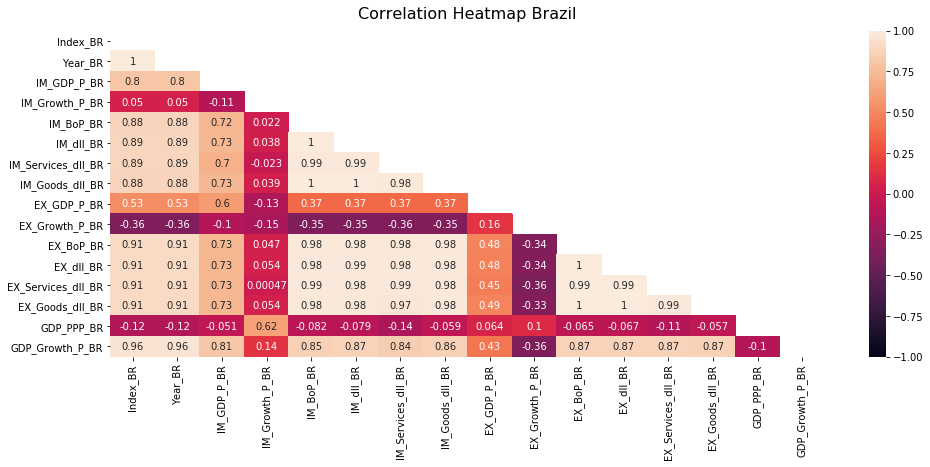

In [80]:
plt.figure(figsize=(16,6))

mask = np.triu(np.ones_like(Brazil_80s.corr(),
              dtype=np.bool))

heatmap = sns.heatmap(Brazil_80s.corr(),
                      mask=mask,
                      vmin=-1,
                      vmax=1, 
                      annot=True)

heatmap.set_title('Correlation Heatmap Brazil', 
                  fontdict={'fontsize':16},
                 pad=12);

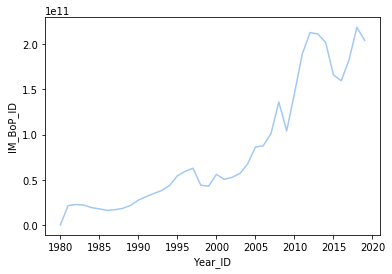

In [74]:
sns.lineplot(data = Indonesia_80s, 
            x = 'Year_ID', 
            y = 'IM_BoP_ID');

In [106]:
fig, axes = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize=(12,6))
plt.subplots_adjust(hspace = 0.5)

for ax in axes.flat:
    
    sns.lineplot(data = Indonesia_80s, 
            x = 'Year_ID', 
            y = 'GDP_PPP_ID',
            color='pink',
            ax1=axes[0,0],
            #plt.axhline(y=5, color='b', linestyle='-'))
   

    sns.lineplot(data = Japan_80s, 
            x = 'Year_JP', 
            y = 'GDP_PPP_JP',
            color='lightsteelblue',
            ax2=axes[0,1],
           # ax = plt.axhline(y=6, color='r', linestyle='-'))

    sns.lineplot(data = Skorea_80s, 
            x = 'Year_KR', 
            y = 'GDP_PPP_KR',
            color='darkcyan',
            ax3=axes[1,0])

    
    sns.lineplot(data = India_80s, 
            x = 'Year_IN', 
            y = 'GDP_PPP_IN',
            color='plum',
            ax4=axes[1,1])

axes[0,0].set_title('Indonesia')
axes[0,1].set_title('Japan');
axes[1,0].set_title('South Korea');
axes[1,1].set_title('India');

ax = plt.axhline(y=6, color='r', linestyle='-', ax=axes[0,1])

# graph.axhline(1.25)

SyntaxError: invalid syntax (<ipython-input-106-45efa77132d7>, line 30)

AxesSubplot(0.547727,0.578;0.352273x0.302)


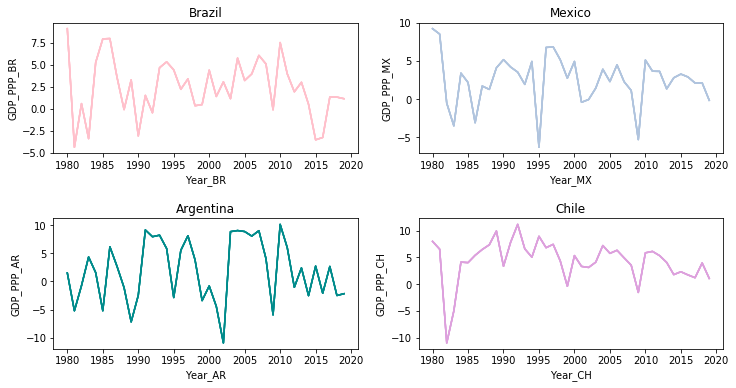

In [90]:
fig, axes = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize=(12,6))
plt.subplots_adjust(hspace = 0.5)

for ax in axes.flat:

    sns.lineplot(data = Brazil_80s, 
            x = 'Year_BR', 
            y = 'GDP_PPP_BR',
            color='pink',
            ax=axes[0,0])

    sns.lineplot(data = Mexico_80s, 
            x = 'Year_MX', 
            y = 'GDP_PPP_MX',
            color='lightsteelblue',
            ax=axes[0,1])

    sns.lineplot(data = Argentina_80s, 
            x = 'Year_AR', 
            y = 'GDP_PPP_AR',
            color='darkcyan',
            ax=axes[1,0])

    sns.lineplot(data = Chile_80s, 
            x = 'Year_CH', 
            y = 'GDP_PPP_CH',
            color='plum',
            ax=axes[1,1])

axes[0,0].set_title('Brazil');
axes[0,1].set_title('Mexico');
axes[1,0].set_title('Argentina');
axes[1,1].set_title('Chile');

Argentina is importing much more than it is exporting, creating unequal inflows of  in the BoP. After the 2008 financial crisis, the number of exports began to lower, therefore showing a lower percentage of growth in its GDP. 

In [ ]:
ax = sns.kdeplot(country['Argentina']['EX_GDP_P'], shade=True)

In [ ]:
sns.jointplot('Year', 'IM_GDP_P_AR', Argentina_80s, kind='hex')

In [ ]:
sns.kdeplot(country['Argentina']['IM_GDP_P'], country['Argentina']['EX_GDP_P'], n_levels=20, cbar=True)

In [ ]:
sns.kdeplot(country['Argentina']['IM_GDP_P'], bw=.15)

In [ ]:
print(len(columns_ID))
print(len(Indonesia_80s.columns))

In [88]:
Brazil_80s.to_csv('Brazil.csv', index=False)